In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

X = number of claims
Y = total payment for all the claims in thousands of Swedish Kronor

In [3]:
df = pd.read_excel("//Users//ihoon//Desktop//dataset//linear+gradient//slr06.xls")
df.head()

*** No CODEPAGE record, no encoding_override: will use 'ascii'


,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [4]:
raw_X = df["X"].values.reshape(-1,1)
y = df["Y"].values

In [11]:
raw_X.flatten()

array([108,  19,  13, 124,  40,  57,  23,  14,  45,  10,   5,  48,  11,
        23,   7,   2,  24,   6,   3,  23,   6,   9,   9,   3,  29,   7,
         4,  20,   7,   4,   0,  25,   6,   5,  22,  11,  61,  12,   4,
        16,  13,  60,  41,  37,  55,  41,  11,  27,   8,   3,  17,  13,
        13,  15,   8,  29,  30,  24,   9,  31,  14,  53,  26])

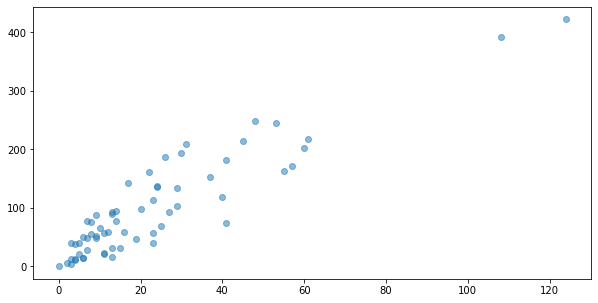

In [5]:
plt.figure(figsize=(10,5))
plt.plot(raw_X,y, 'o', alpha=0.5)

In [12]:
raw_X[:5], y[:5]

(array([[108],
        [ 19],
        [ 13],
        [124],
        [ 40]]),
 array([392.5,  46.2,  15.7, 422.2, 119.4]))

In [17]:
np.ones((len(raw_X), 1))[:3]

array([[1.],
       [1.],
       [1.]])

In [18]:
X = np.concatenate( (np.ones((len(raw_X), 1)), raw_X), axis = 1 )
X[:5]

array([[  1., 108.],
       [  1.,  19.],
       [  1.,  13.],
       [  1., 124.],
       [  1.,  40.]])

In [19]:
w = np.random.normal((2,1))
w

array([2.8005795 , 1.58242976])

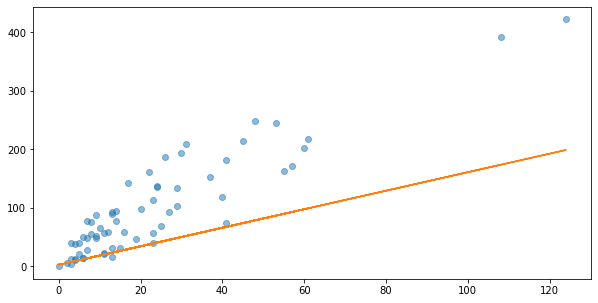

In [20]:
plt.figure(figsize=(10,5))
y_predict = np.dot(X, w)
plt.plot(raw_X,y,"o", alpha=0.5)
plt.plot(raw_X,y_predict)

In [21]:
def hypothesis_function(X, theta):
    return X.dot(theta)

In [22]:
h = hypothesis_function(X, w)

In [23]:
def cost_function(h, y):
    return (1/(2*len(y))) * np.sum((h-y)**2)

In [24]:
h = hypothesis_function(X,w)
cost_function(h, y)

3274.207801454372

#GRADIENT DESENT

In [25]:
def gradient_descent(X, y, w, alpha, iterations):
    theta = w
    m = len(y)
    
    theta_list = [theta.tolist()]
    cost = cost_function(hypothesis_function(X, theta), y)
    cost_list = [cost]

    for i in range(iterations):
        t0 = theta[0] - (alpha / m) * np.sum(np.dot(X, theta) - y)
        t1 = theta[1] - (alpha / m) * np.sum((np.dot(X, theta) - y) * X[:,1])
        theta = np.array([t0, t1])
        
        if i % 10== 0:
            theta_list.append(theta.tolist())
            cost = cost_function(hypothesis_function(X, theta), y)
            cost_list.append(cost)


    return theta, theta_list, cost_list

In [26]:
iterations = 10000
alpha = 0.001

theta, theta_list, cost_list = gradient_descent(X, y, w, alpha, iterations)
cost = cost_function(hypothesis_function(X, theta), y)

print("theta:", theta)
print('cost:', cost_function(hypothesis_function(X, theta), y))

theta: [19.88520228  3.41618325]
cost: 625.3739842534171


In [27]:
theta_list[:10]

[[2.800579499037806, 1.5824297639586344],
 [2.859721044151589, 3.9198841660991133],
 [2.943206775556333, 3.7820011098995137],
 [3.0291936207332397, 3.780144449996904],
 [3.114746848141616, 3.778297152930338],
 [3.199868644445813, 3.776459171484437],
 [3.2845611852831893, 3.7746304586820303],
 [3.3688266353197136, 3.7728109677828465],
 [3.4526671483052964, 3.771000652282318],
 [3.536084867128835, 3.7691994659103907]]

In [28]:
theta_list = np.array(theta_list)

In [29]:
cost_list[:5]

[3274.207801454372,
 709.4548230177511,
 698.8813981893285,
 698.1418650956358,
 697.4097718872854]

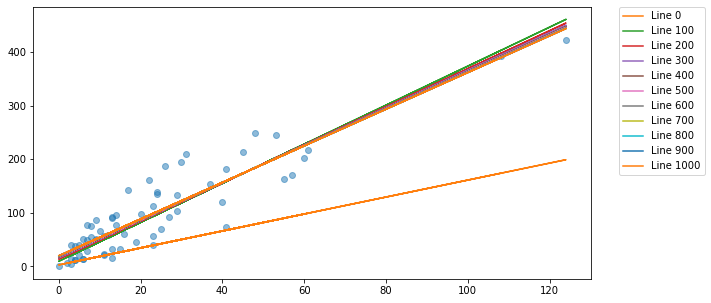

In [31]:
plt.figure(figsize=(10,5))

y_predict_step = np.dot(X, theta_list.transpose())

y_predict_step
plt.plot(raw_X, y, "o", alpha = 0.5)
for i in range(0,len(cost_list),100):
    plt.plot(raw_X, y_predict_step[:, i], label = 'Line %d'%i)
    
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [32]:
# 여기부턴 참고 - 복붙한 내용임 나중에 복기할 것.

In [33]:
th0 = theta_list[:,0]
th1 = theta_list[:,1]
TH0, TH1 = np.meshgrid(th0, th1)

In [34]:
Js = np.array([cost_function(y, hypothesis_function(X, [th0, th1])) for th0, th1 in zip(np.ravel(TH0), np.ravel(TH1))])
Js = Js.reshape(TH0.shape)

<a list of 6 text.Text objects>

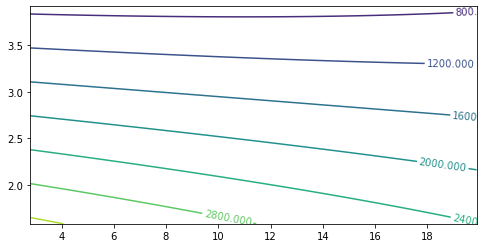

In [35]:
plt.figure(figsize=(8,4))
CS = plt.contour(TH0, TH1, Js)
plt.clabel(CS, inline=True, fontsize=10,inline_spacing=2)

In [36]:
from mpl_toolkits.mplot3d import Axes3D

ms = np.linspace(theta[0] - 15 , theta[0] + 15, 100)
bs = np.linspace(theta[1] - 15 , theta[1] + 15, 100)

M, B = np.meshgrid(ms, bs)

zs = np.array([ cost_function(y, hypothesis_function(X, theta))
    for theta in zip(np.ravel(M), np.ravel(B))])
Z = zs.reshape(M.shape)

<ipython-input-37-3b909e3cb67a>:5: UserWarning: The following kwargs were not used by contour: 'color'
  ax.contour(M, B, Z, 10, color='b', alpha=0.5, offset=0, stride=30)


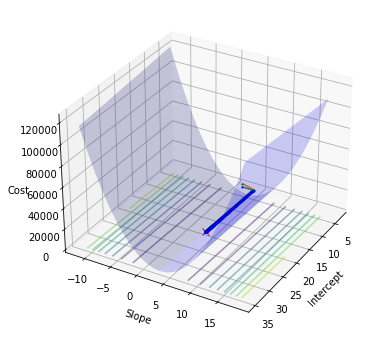

In [37]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(M, B, Z, rstride=1, cstride=1, color='b', alpha=0.2)
ax.contour(M, B, Z, 10, color='b', alpha=0.5, offset=0, stride=30)


ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Cost') 
ax.view_init(elev=30., azim=30)
ax.plot([theta[0]], [theta[1]], [cost_list[-1]] , markerfacecolor='r', markeredgecolor='r', marker='x', markersize=7);

ax.plot(theta_list[:,0], theta_list[:,1], cost_list, markerfacecolor='g', markeredgecolor='g', marker='o', 
                markersize=1);
ax.plot(theta_list[:,0], theta_list[:,1], 0 , markerfacecolor='b', markeredgecolor='b', marker='.', markersize=2);